---
## **FIGURES AND SUBPLOTS**
---

Matplotlib allows you to create figures and arrange multiple subplots (axes) within those figures to visualize data in various formats. Understanding how to create, customize, and manage figures and subplots is fundamental for creating clear and effective visualizations.

### **Creating Figures**
- Plots in matplotlib reside within a Figure object. You can create a new figure with **plt.figure**.
- A figure in Matplotlib is the whole window or page that everything is drawn on. 
- It acts as a container for all plots and other elements.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

You can customize the figure by using paramenters like **figsize** to set the size of the figure in inches.

In [8]:
fig = plt.figure(figsize = (8, 6))

<Figure size 800x600 with 0 Axes>

### **Adding Subplots**
Subplots (or Axes) are the individual plots or charts within a figure. They are arranged in a grid format defined by rows and columns.

- Use **fig.add_subplot(rows, cols, index)** to add subplots to a figure.
- **rows** and **cols** specify the grid layout.
- **index** specifies the position of the subplot in the grid (starting from 1).

In [9]:
ax1 = fig.add_subplot(2, 2, 1)   # First subplot of a 2x2 grid
ax2 = fig.add_subplot(2, 2, 2)   # Second subplot of a 2x2 grid
ax3 = fig.add_subplot(2, 2, 3)   # Third subplot of a 2x2 grid
ax4 = fig.add_subplot(2, 2, 4)   # Fourth subplot of a 2x2 grid
plt.show()

The above code will create 4 subplots within a single figure But it is a lengthy task. Instead we will use a shortcut to create subplot.

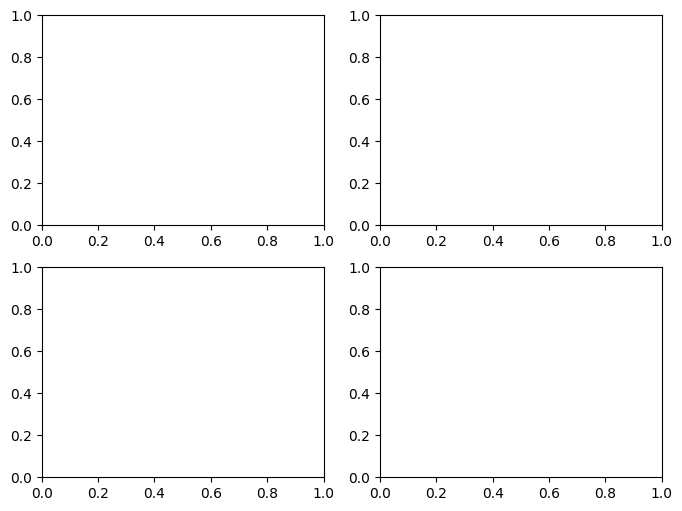

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))

### **Accessing Subplots**
Subplots are accessed through the axes object, which is an array of Axes objects.

In [11]:
# Example data for a scatter plot
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 100, 86, 103, 87, 94, 78, 77, 85, 86]

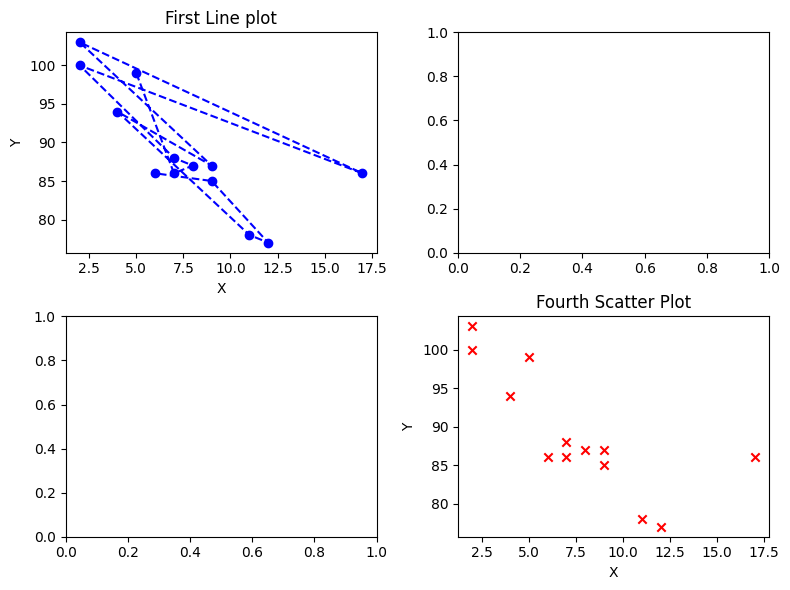

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))

axes[0, 0].plot(x, y, color='blue', linestyle='--', marker='o', label='Data')   # Plot the first subplot
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('First Line plot')

axes[1, 1].scatter(x, y, color='red', marker='x', label='Scatter')     # Plot the fourth subplot
axes[1, 1].set_xlabel('X')  
axes[1, 1].set_ylabel('Y')  
axes[1, 1].set_title('Fourth Scatter Plot')  

# Adjust layout
plt.tight_layout()

# Display the figure with subplots
plt.show()

We can also use plotting functions (plot(), scatter(), bar(), pie(), hist() etc.) on the Axes objects to visualize data.

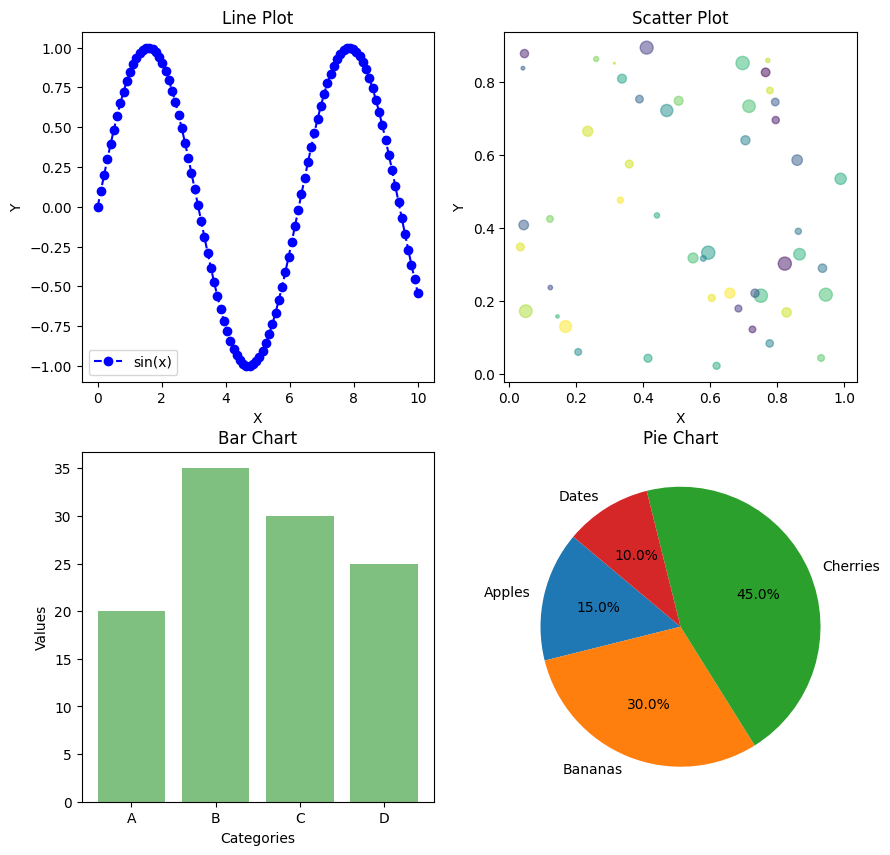

In [13]:
# Create a figure with a single subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot data using plot()
# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
axes[0, 0].plot(x, y, color='blue', linestyle='--', marker='o', label='sin(x)')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('Line Plot')
axes[0, 0].legend()

# Plot data using scatter()
# Generate sample data
x = np.random.rand(50)
y = np.random.rand(50)
sizes = np.random.rand(50) * 100  # for size variation
colors = np.random.rand(50)
axes[0, 1].scatter(x, y, s=sizes, c=colors, alpha=0.5, cmap='viridis')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].set_title('Scatter Plot')

# Plot data using bar()
# Generate sample data
categories = ['A', 'B', 'C', 'D']
values = [20, 35, 30, 25]
axes[1, 0].bar(categories, values, color='green', alpha=0.5)
axes[1, 0].set_xlabel('Categories')
axes[1, 0].set_ylabel('Values')
axes[1, 0].set_title('Bar Chart')

# Plot data using pie()
# Sample data
sizes = [15, 30, 45, 10]
labels = ['Apples', 'Bananas', 'Cherries', 'Dates']
axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Pie Chart')

# Display the plot
plt.show()

Now let's use the dataframes that we used in the last excercise to do some practice of visualization of dataframes.

In [27]:
medals = pd.read_csv('/kaggle/input/medals/medals_by_country_2016.csv')

In [28]:
medals.rename(columns={'Unnamed: 0': 'country'}, inplace=True)
medals.set_index('country', inplace = True)
medals.head()

,Bronze,Gold,Silver
country,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


In [29]:
recipe = pd.read_csv('/kaggle/input/site-traffic/recipe_site_traffic_2212.csv')
recipe.rename(columns = {'Chicken Breast': 'Chicken'})
#replacing the rows including "Chicken Breast" with empty string
recipe['category'] = recipe['category'].str.replace(" Breast", "")

#checking the values of servings column again
counts = recipe['category'].value_counts()
counts

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

In [30]:
climate = pd.read_csv('/kaggle/input/climate-change/climate_change.csv')

In [31]:
# Convert date column to datetime
climate['date'] = pd.to_datetime(climate['date'])

# Set date column as index
climate.set_index('date', inplace=True)

In [32]:
climate.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


Now that we have created the dataframes, now we eill create the subplots of these datframes.

In [36]:
label = ['Chicken', 'Breakfast', 'Beverages', 'Lunch/Snacks', 'Potato', 'Pork', 'Vegetable', 'Dessert', 'Meat', 'One Dish Meal']
color = ["pink", "deeppink", "mediumvioletred", "purple", "blueviolet", "darkblue", "lightblue", "teal", "darkgreen", "lightgreen"]

/tmp/ipykernel_33/3895830503.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(medals.index, rotation = 90)


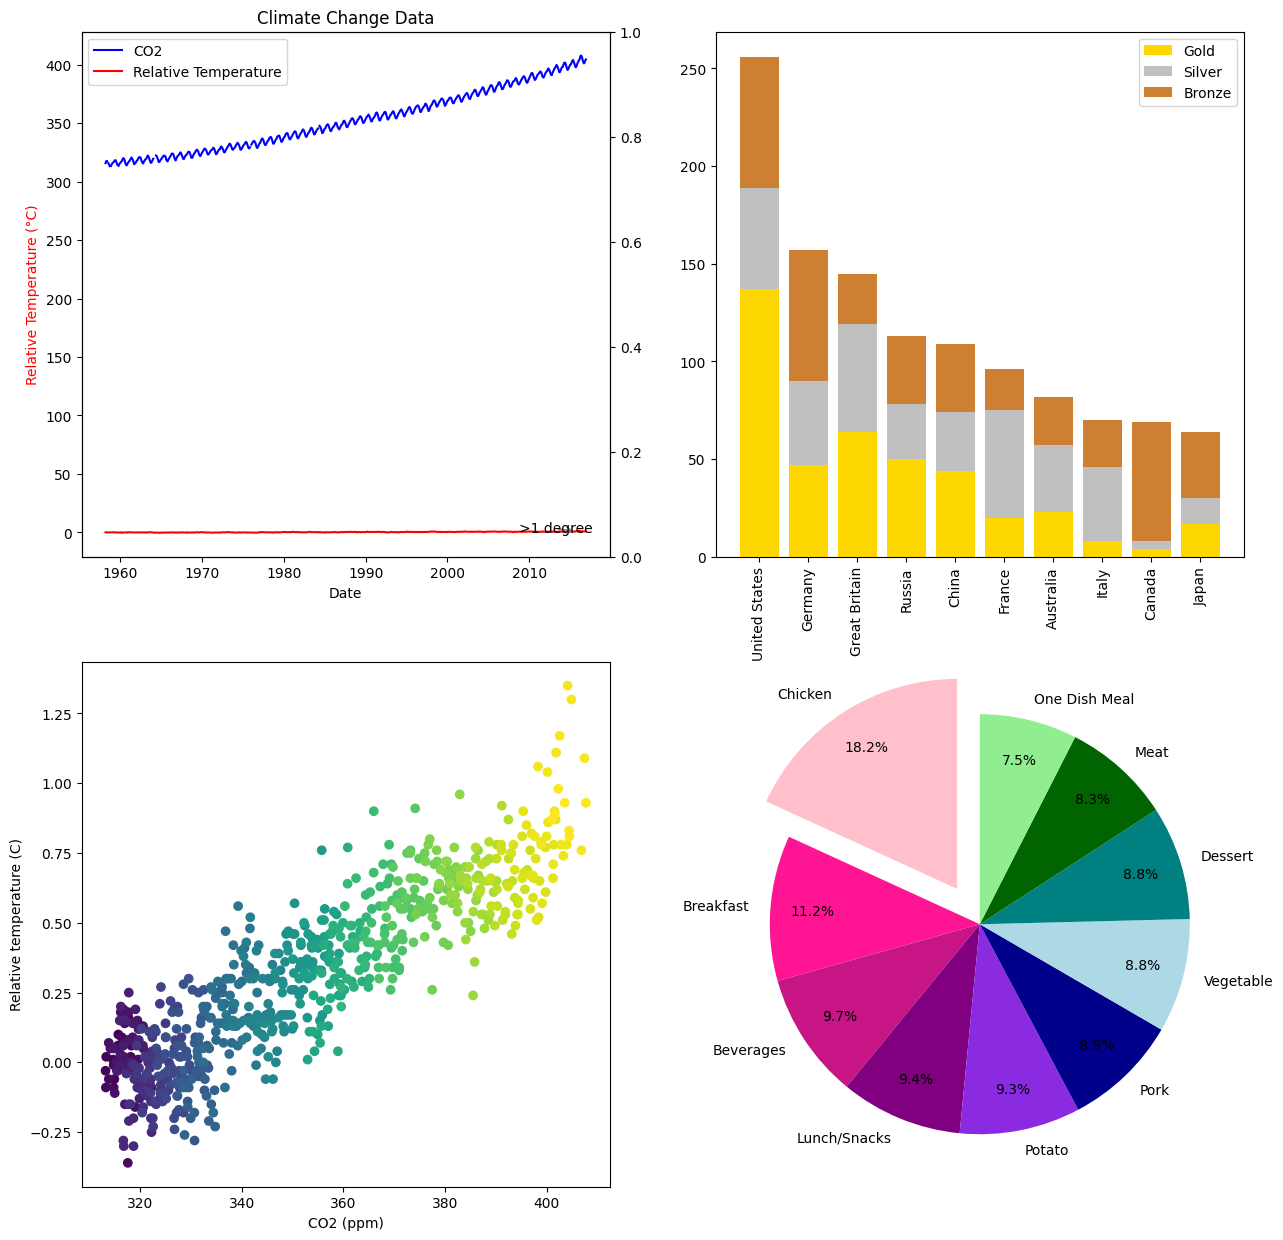

In [41]:
# Create a figure with a single subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot the CO2 data
axes[0, 0].plot(climate.index, climate['co2'], 'b', label='CO2')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('CO2 (ppm)', color='b')
# Create a twin Axes that shares the x-axis
axes[0, 0].twinx()
# Plot the relative temperature data
axes[0, 0].plot(climate.index, climate['relative_temp'], 'r', label='Relative Temperature')
axes[0, 0].set_ylabel('Relative Temperature (°C)', color='r')
# Add title
axes[0, 0].set_title('Climate Change Data')
# Annotate point with relative temperature >1 degree
axes[0, 0].annotate(">1 degree", 
             xy = (pd.Timestamp('2015-10-06'), 1),
             xytext = (pd.Timestamp('2008-10-06'), -0.2),
             arrowprops={"arrowstyle":"->", "color":"gray"})
axes[0, 0].legend()

# Add bars for "Gold" with the label "Gold"
axes[0, 1].bar(medals.index, medals['Gold'], label = 'Gold',  color='gold')
# Stack bars for "Silver" on top with label "Silver"
axes[0, 1].bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = 'Silver', color='silver')
# Stack  for "Bronze" on top of that with label "Bronze"
axes[0, 1].bar(medals.index, medals['Bronze'], bottom = medals['Gold'] + medals['Silver'], label = 'Bronze',color='#cd7f32')
axes[0, 1].set_xticklabels(medals.index, rotation = 90)
axes[0, 1].legend()



# Add data: "co2", "relative_temp" as x-y, index as color
axes[1, 0].scatter(climate['co2'], climate['relative_temp'], c = climate.index)
# Set the x-axis label to "CO2 (ppm)"
axes[1, 0].set_xlabel("CO2 (ppm)")
# Set the y-axis label to "Relative temperature (C)"
axes[1, 0].set_ylabel("Relative temperature (C)")




axes[1, 1].pie(counts, labels = label, colors = color, explode=(0.2,0,0,0,0,0,0,0,0,0), 
        autopct="%0.1f%%", pctdistance = 0.8, startangle = 90, radius = 1)

# Display the plot
plt.show()

---
## **HOSTOGRAMS**
---
Histograms display the distribution of a dataset by dividing the data into bins and counting the number of observations in each bin. This helps visualize the frequency distribution of the data.

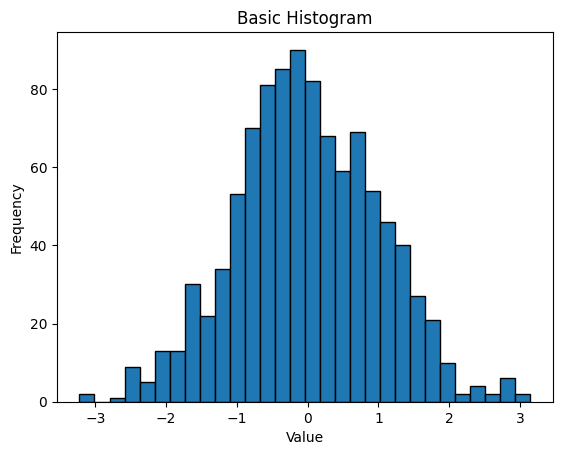

In [42]:
# Example data
data = np.random.normal(0, 1, 1000)  # 1000 data points from a normal distribution

# Create a basic histogram
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
plt.show()

---
### **Customize Histogram Appearance**
You can customize the appearance of the histogram by adjusting the number of bins, colors, and adding grid lines.

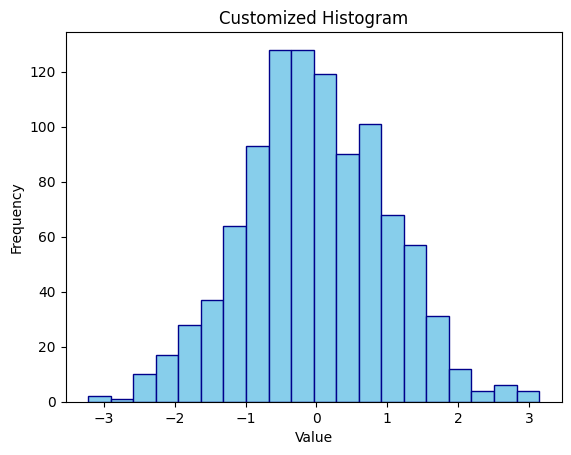

In [47]:
# Customize histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='darkblue', alpha=1.0)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Customized Histogram')
plt.show()

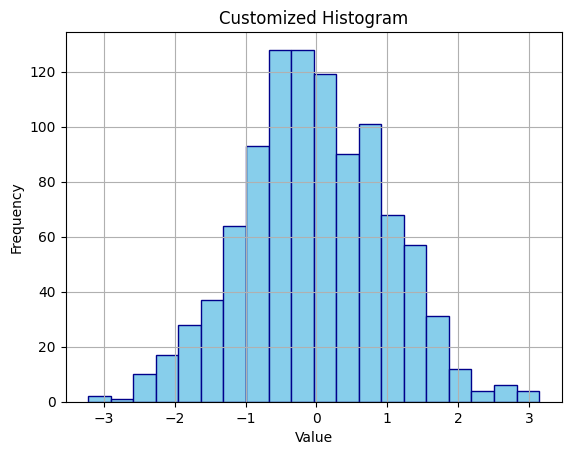

In [48]:
# Customize histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='darkblue', alpha=1.0)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Customized Histogram')
plt.grid(True)
plt.show()

---
### **Overlay Multiple Histograms**
Sometimes, it's useful to compare multiple distributions on the same plot.

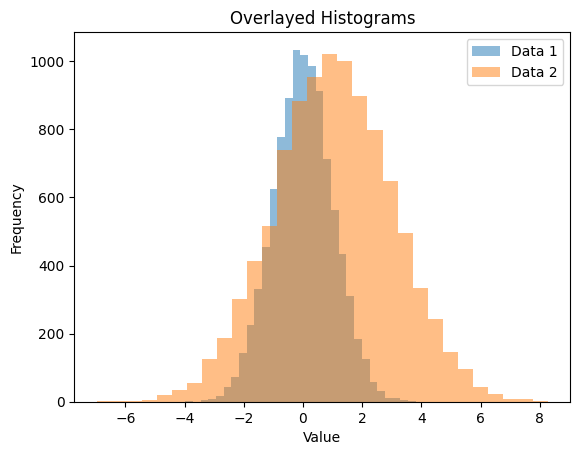

In [51]:
# Example data
data1 = np.random.normal(0, 1, 10000)
data2 = np.random.normal(1, 2, 10000)

# Overlay multiple histograms
plt.hist(data1, bins=30, alpha=0.5, label='Data 1')
plt.hist(data2, bins=30, alpha=0.5, label='Data 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms')
plt.legend()
plt.show()


---
### **BOX PLOTS**
---
Box plots (or box-and-whisker plots) provide a summary of a dataset's distribution, showing the median, quartiles, and potential outliers.

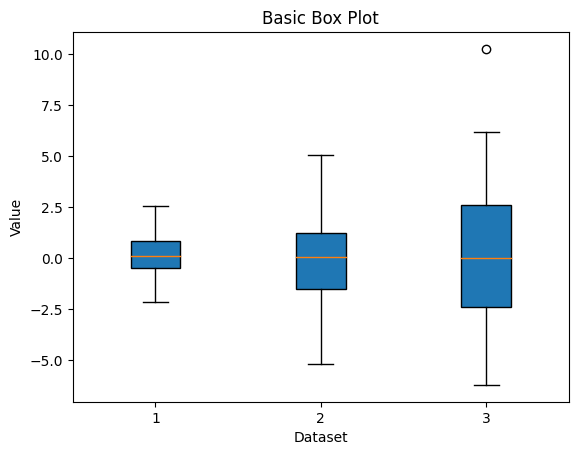

In [52]:
# Example data
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# Create a basic box plot
plt.boxplot(data, vert=True, patch_artist=True)
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Basic Box Plot')
plt.show()


---
### **Customize Box Plot Appearance**

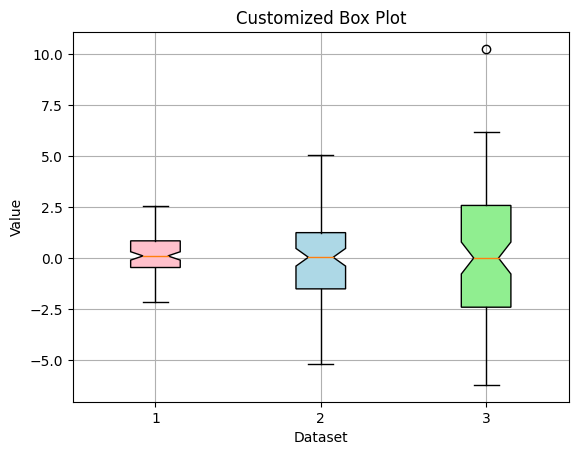

In [53]:
# Customize box plot
box = plt.boxplot(data, vert=True, patch_artist=True, notch=True)

# Colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Customized Box Plot')
plt.grid(True)
plt.show()


### **Display Multiple Box Plots Side-by-Side**
Displaying multiple box plots side-by-side is useful for comparing distributions across different datasets.

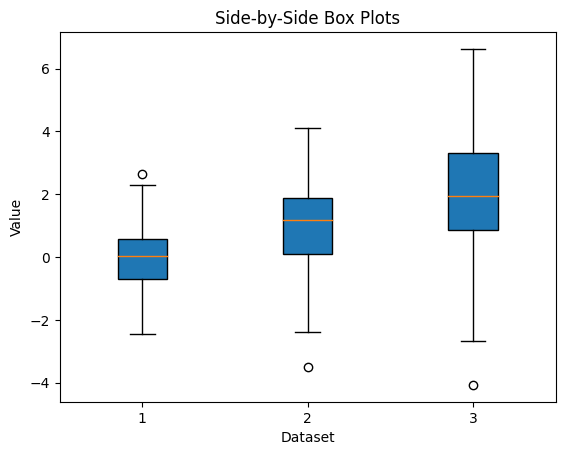

In [54]:
# Example data
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 1.5, 100)
data3 = np.random.normal(2, 2, 100)

# Create side-by-side box plots
data = [data1, data2, data3]
plt.boxplot(data, patch_artist=True)
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.title('Side-by-Side Box Plots')
plt.show()
